In [ ]:
import re
import numpy as np

def create_unique_word_dict(text:list) -> dict:
    """
    A method that creates a dictionary where the keys are unique words
    and key values are indices
    """
    # Getting all the unique words from our text and sorting them alphabetically
    words = list(set(text))
    words.sort()

    # Creating the dictionary for the unique words
    unique_word_dict = {}
    for i, word in enumerate(words):
        unique_word_dict.update({
            word: i
        })

    return unique_word_dict    

def text_preprocessing(
    text:list,
    punctuations = r'''!()-[]{};:'"\,<>./?@#$%^&*_“~''',
    stop_words=['and', 'a', 'is', 'the', 'in', 'be', 'will']
    )->list:
    """
    A method to preproces text
    """
    for x in text.lower(): 
        if x in punctuations: 
            text = text.replace(x, "")

    # Removing words that have numbers in them
    text = re.sub(r'\w*\d\w*', '', text)

    # Removing digits
    text = re.sub(r'[0-9]+', '', text)

    # Cleaning the whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Setting every word to lower
    text = text.lower()

    # Converting all our text to a list 
    text = text.split(' ')

    # Droping empty strings
    text = [x for x in text if x!='']

    # Droping stop words
    text = [x for x in text if x not in stop_words]

    return text

# Functions to find the most similar word 
def euclidean(vec1:np.array, vec2:np.array) -> float:
    """
    A function to calculate the euclidean distance between two vectors
    """
    return np.sqrt(np.sum((vec1 - vec2)**2))

def find_similar(word:str, embedding_dict:dict, top_n=10)->list:
    """
    A method to find the most similar word based on the learnt embeddings
    """
    dist_dict = {}
    word_vector = embedding_dict.get(word, [])
    if len(word_vector) > 0:
        for key, value in embedding_dict.items():
            if key!=word:
                dist = euclidean(word_vector, value)
                dist_dict.update({
                    key: dist
                })

        return sorted(dist_dict.items(), key=lambda x: x[1])[0:top_n]  

  Using cached Keras-2.2.4-py2.py3-none-any.whl (312 kB)
  Attempting uninstall: keras
    Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1


ERROR: Could not find a version that satisfies the requirement tensorflow==1.13. (from versions: 1.13.0rc1, 1.13.0rc2, 1.13.1, 1.13.2, 1.14.0rc0, 1.14.0rc1, 1.14.0, 1.15.0rc0, 1.15.0rc1, 1.15.0rc2, 1.15.0rc3, 1.15.0, 1.15.2, 1.15.3, 1.15.4, 1.15.5, 2.0.0a0, 2.0.0b0, 2.0.0b1, 2.0.0rc0, 2.0.0rc1, 2.0.0rc2, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.1.0rc0, 2.1.0rc1, 2.1.0rc2, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.2.0rc0, 2.2.0rc1, 2.2.0rc2, 2.2.0rc3, 2.2.0rc4, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0rc0, 2.3.0rc1, 2.3.0rc2, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.3.4, 2.4.0rc0, 2.4.0rc1, 2.4.0rc2, 2.4.0rc3, 2.4.0rc4, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.5.0rc0, 2.5.0rc1, 2.5.0rc2, 2.5.0rc3, 2.5.0, 2.5.1, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.7.0rc0, 2.7.0rc1)
ERROR: No matching distribution found for tensorflow==1.13.


84it [00:00, 72449.42it/s]


Epoch 1/1000
84/84 [==============================] - 0s 681us/step - loss: 3.0574
Epoch 2/1000
84/84 [==============================] - 0s 26us/step - loss: 3.0563
Epoch 3/1000
84/84 [==============================] - 0s 57us/step - loss: 3.0553
Epoch 4/1000
84/84 [==============================] - 0s 52us/step - loss: 3.0542
Epoch 5/1000
84/84 [==============================] - 0s 64us/step - loss: 3.0532
Epoch 6/1000
84/84 [==============================] - 0s 23us/step - loss: 3.0522
Epoch 7/1000
84/84 [==============================] - 0s 51us/step - loss: 3.0511
Epoch 8/1000
84/84 [==============================] - 0s 32us/step - loss: 3.0501
Epoch 9/1000
84/84 [==============================] - 0s 39us/step - loss: 3.0491
Epoch 10/1000
84/84 [==============================] - 0s 31us/step - loss: 3.0480
Epoch 11/1000
84/84 [==============================] - 0s 43us/step - loss: 3.0470
Epoch 12/1000
84/84 [==============================] - 0s 32us/step - loss: 3.0460
Epoch 13/100

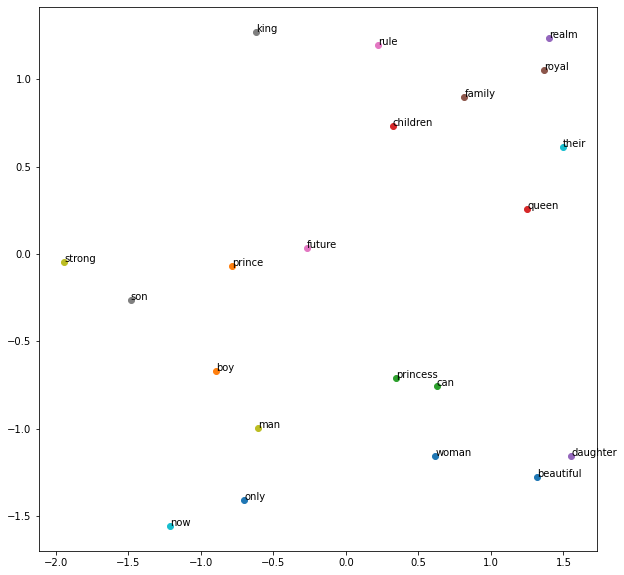

In [ ]:
import itertools
import pandas as pd
import numpy as np
import re
import os
!pip install tqdm==4.62.3
from tqdm import tqdm
# Drawing the embeddings
import matplotlib.pyplot as plt
!pip install keras==2.2.4
!pip install tensorflow==1.13.
%tensorflow_version 1.x
# Deep learning: 
from keras.models import Input, Model
from keras.layers import Dense

from scipy import sparse



# Reading the text from the input folder
texts = pd.read_csv('/content/sample.csv')
texts = [x for x in texts['text']]

# Defining the window for context
window = 2

# Creating a placeholder for the scanning of the word list
word_lists = []
all_text = []

for text in texts:

    # Cleaning the text
    text = text_preprocessing(text)

    # Appending to the all text list
    all_text += text 

    # Creating a context dictionary
    for i, word in enumerate(text):
        for w in range(window):
            # Getting the context that is ahead by *window* words
            if i + 1 + w < len(text): 
                word_lists.append([word] + [text[(i + 1 + w)]])
            # Getting the context that is behind by *window* words    
            if i - w - 1 >= 0:
                word_lists.append([word] + [text[(i - w - 1)]])

unique_word_dict = create_unique_word_dict(all_text)

# Defining the number of features (unique words)
n_words = len(unique_word_dict)

# Getting all the unique words 
words = list(unique_word_dict.keys())

# Creating the X and Y matrices using one hot encoding
X = []
Y = []

for i, word_list in tqdm(enumerate(word_lists)):
    # Getting the indices
    main_word_index = unique_word_dict.get(word_list[0])
    context_word_index = unique_word_dict.get(word_list[1])

    # Creating the placeholders   
    X_row = np.zeros(n_words)
    Y_row = np.zeros(n_words)

    # One hot encoding the main word
    X_row[main_word_index] = 1

    # One hot encoding the Y matrix words 
    Y_row[context_word_index] = 1

    # Appending to the main matrices
    X.append(X_row)
    Y.append(Y_row)

# Converting the matrices into a sparse format because the vast majority of the data are 0s
X = sparse.csr_matrix(X)
Y = sparse.csr_matrix(Y)

# Defining the size of the embedding
embed_size = 2

# Defining the neural network
inp = Input(shape=(X.shape[1],))
x = Dense(units=embed_size, activation='linear')(inp)
x = Dense(units=Y.shape[1], activation='softmax')(x)
model = Model(inputs=inp, outputs=x)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')

# Optimizing the network weights
model.fit(
    x=X, 
    y=Y, 
    batch_size=256,
    epochs=1000
    )

# Obtaining the weights from the neural network. 
# These are the so called word embeddings

# The input layer 
weights = model.get_weights()[0]

# Creating a dictionary to store the embeddings in. The key is a unique word and 
# the value is the numeric vector
embedding_dict = {}
for word in words: 
    embedding_dict.update({
        word: weights[unique_word_dict.get(word)]
        })

# Ploting the embeddings
plt.figure(figsize=(10, 10))
for word in list(unique_word_dict.keys()):
    coord = embedding_dict.get(word)
    plt.scatter(coord[0], coord[1])
    plt.annotate(word, (coord[0], coord[1]))       

# Saving the embedding vector to a txt file
try:
    os.mkdir(f'{os.getcwd()}\\output')        
except Exception as e:
    print(f'Cannot create output folder: {e}')

with open(f'{os.getcwd()}\\output\\embedding.txt', 'w') as f:
    for key, value in embedding_dict.items():
        try:
            f.write(f'{key}: {value}\n')   
        except Exception as e:
            print(f'Cannot write word {key} to dict: {e}') 

In [ ]:
embedding_dict

{'beautiful': array([ 1.3175304, -1.2795318], dtype=float32),
 'boy': array([-0.89652056, -0.66772383], dtype=float32),
 'can': array([ 0.62635833, -0.7554304 ], dtype=float32),
 'children': array([0.32402936, 0.7296579 ], dtype=float32),
 'daughter': array([ 1.5538425, -1.1587029], dtype=float32),
 'family': array([0.8173822, 0.9003274], dtype=float32),
 'future': array([-0.26762772,  0.03143724], dtype=float32),
 'king': array([-0.6159221,  1.2711627], dtype=float32),
 'man': array([-0.6032443, -0.9969942], dtype=float32),
 'now': array([-1.2104443, -1.5579338], dtype=float32),
 'only': array([-0.6992181, -1.411142 ], dtype=float32),
 'prince': array([-0.7820765 , -0.06611645], dtype=float32),
 'princess': array([ 0.3463114 , -0.70803344], dtype=float32),
 'queen': array([1.2513431, 0.2581317], dtype=float32),
 'realm': array([1.3997214, 1.2344657], dtype=float32),
 'royal': array([1.3696678, 1.0532702], dtype=float32),
 'rule': array([0.22025646, 1.197946  ], dtype=float32),
 'son':